In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


#import libraries

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Air quality prediction/air-quality-observations.csv'

df=pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
display(df.head())

,device_id,date_time,location_description,latitude,longitude,pm1,pm25,pm10,ozone,nitrogen_dioxide,carbon_monoxide,air_quality_category,point
0,ems-b879,2023-01-17T00:26:09+00:00,Fairyland,-37.546758,143.823172,3,3,4,70,97,-1006,Fair,"-37.546758, 143.823172"
1,ems-b879,2023-01-17T02:41:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,75,104,218,Fair,"-37.546758, 143.823172"
2,ems-b879,2023-01-17T03:26:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,61,104,743,Fair,"-37.546758, 143.823172"
3,ems-b879,2023-01-15T05:11:27+00:00,Fairyland,-37.546758,143.823172,0,0,0,70,119,-2143,Fair,"-37.546758, 143.823172"
4,ems-b879,2022-12-23T19:45:10+00:00,Fairyland,-37.546758,143.823172,3,4,4,65,119,-4766,Fair,"-37.546758, 143.823172"


In [ ]:
df.tail()

,device_id,date_time,location_description,latitude,longitude,pm1,pm25,pm10,ozone,nitrogen_dioxide,carbon_monoxide,air_quality_category,point
110966,ems-b879,2022-03-31T04:14:19+00:00,Fairyland,-37.546758,143.823172,1,1,1,61,97,-4242,Moderate,"-37.546758, 143.823172"
110967,ems-b879,2022-03-31T04:29:19+00:00,Fairyland,-37.546758,143.823172,0,0,1,65,97,-4242,Moderate,"-37.546758, 143.823172"
110968,ems-b879,2022-03-31T04:44:19+00:00,Fairyland,-37.546758,143.823172,0,0,1,70,97,-4154,Moderate,"-37.546758, 143.823172"
110969,ems-b879,2022-03-31T04:59:18+00:00,Fairyland,-37.546758,143.823172,0,0,0,61,97,-4242,Moderate,"-37.546758, 143.823172"
110970,ems-b879,2022-03-31T05:14:18+00:00,Fairyland,-37.546758,143.823172,0,0,0,75,112,-4416,Moderate,"-37.546758, 143.823172"


In [ ]:
# Convert to datetime
df["date_time"] = pd.to_datetime(df["date_time"])

In [ ]:
df.dtypes

,0
device_id,object
date_time,"datetime64[ns, UTC]"
location_description,object
latitude,float64
longitude,float64
pm1,int64
pm25,int64
pm10,int64
ozone,int64
nitrogen_dioxide,int64


In [ ]:
df=df.rename(columns={"device_id": "ID","date_time": "Time","location_description": "Location", "latitude":"Latitude", "longitude": "longitude", "pm1":"PM1","pm25":"PM25", "pm10":"PM10" ,"ozone":"O3","nitrogen_dioxide":"NO2","carbon_monoxide":"CO","air_quality_category": "AQ","point":"Point"})
display(df.head())

,ID,Time,Location,Latitude,longitude,PM1,PM25,PM10,O3,NO2,CO,AQ,Point
0,ems-b879,2023-01-17 00:26:09+00:00,Fairyland,-37.546758,143.823172,3,3,4,70,97,-1006,Fair,"-37.546758, 143.823172"
1,ems-b879,2023-01-17 02:41:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,75,104,218,Fair,"-37.546758, 143.823172"
2,ems-b879,2023-01-17 03:26:07+00:00,Fairyland,-37.546758,143.823172,2,2,2,61,104,743,Fair,"-37.546758, 143.823172"
3,ems-b879,2023-01-15 05:11:27+00:00,Fairyland,-37.546758,143.823172,0,0,0,70,119,-2143,Fair,"-37.546758, 143.823172"
4,ems-b879,2022-12-23 19:45:10+00:00,Fairyland,-37.546758,143.823172,3,4,4,65,119,-4766,Fair,"-37.546758, 143.823172"


# Handling missing values and remove duplicates

In [ ]:
df.shape

(110971, 13)

In [ ]:
df.count()

,0
ID,110971
Time,110970
Location,110971
Latitude,110971
longitude,110971
PM1,110971
PM25,110971
PM10,110971
O3,110971
NO2,110971


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

#check duplicate rows

number of duplicate rows:  (0, 13)


No duplicate rows

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
ID           0
Time         1
Location     0
Latitude     0
longitude    0
PM1          0
PM25         0
PM10         0
O3           0
NO2          0
CO           0
AQ           0
Point        0
dtype: int64


Time has a one missing value


Percentage of Missing Values in Each Column:
ID           0.000000
Time         0.000901
Location     0.000000
Latitude     0.000000
longitude    0.000000
PM1          0.000000
PM25         0.000000
PM10         0.000000
O3           0.000000
NO2          0.000000
CO           0.000000
AQ           0.000000
Point        0.000000
dtype: float64


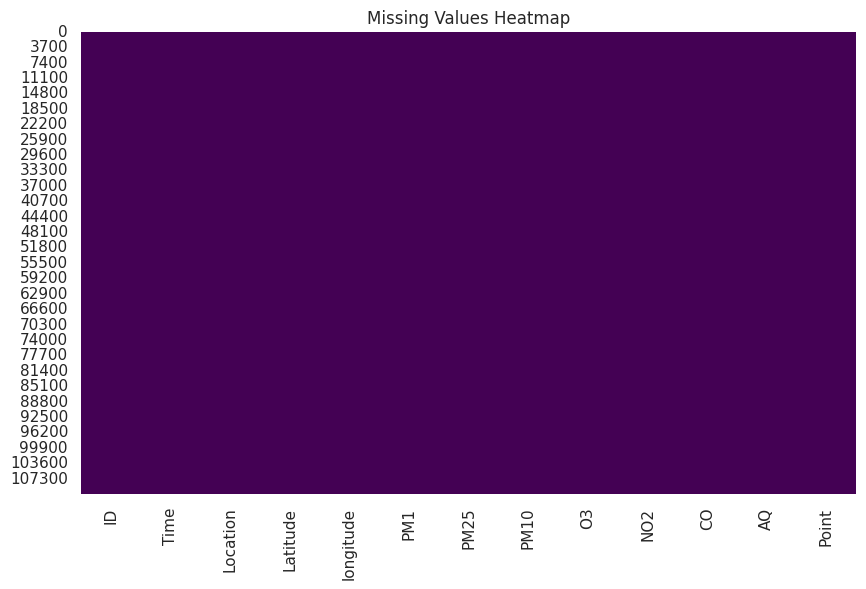

In [ ]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('/content/drive/MyDrive/Air quality prediction/eda_visualizations/missing_value.png')
plt.show()

In [ ]:
df=df.dropna()
df.count()

#remove the missing value

,0
ID,110970
Time,110970
Location,110970
Latitude,110970
longitude,110970
PM1,110970
PM25,110970
PM10,110970
O3,110970
NO2,110970
